In [7]:
import cv2 as cv
import collections as col
import os.path
from typing import List
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [12]:



def load_images_from_folder(images_FP7):
    images = []
    list_lw = []
    for bild in os.listdir(images_FP7):
    
        #print(bild)
        name = bild.split('_')
        lw_in_name = name[3].split('.')
        lenkwinkel = int(lw_in_name[0])
        # print(name)
        # print(lenkwinkel)
        img = cv.imread(os.path.join(images_FP7,bild))
        #print(img.shape)
        #image_lw = [img, lenkwinkel]
        if img is not None:
            images.append(img)
            list_lw.append(lenkwinkel)
            
    return images, list_lw

    #Lenkwinkel_Dict:
    #path_dir: str = r"/home/imm-81/c2c/camp2code-project_phase_2/Code/images_FP7"

    #content_dir: List[str] = os.listdir(path_dir)
#df = pd.DataFrame
X1, y = load_images_from_folder('images_FP7')
X = np.array(X1)
y = np.array(y).astype('float')
print(X.shape)
print(y.shape)

# Bild_list_array = load_images_from_folder('images_FP7')
# print(len(Bild_list_array))
# bild_act = Bild_list_array[0]
# print(bild_act[1])
# print(len(bild_act[0]))
# print(bild_act[0].shape)
# cv.imshow('test', bild_act[0])
# cv.waitKey(0)
# cv.destroyAllWindows()





(1243, 168, 640, 3)
(1243,)


In [13]:
import pandas as pd
pd.DataFrame({'shape':[x.shape for x in X]}).value_counts()


shape        
(168, 640, 3)    1243
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# print(X_train)

In [15]:
# Keras Sequntial API

from tensorflow.keras.layers import Conv2D, Dropout, Flatten
model = tf.keras.Sequential(name='Team_Israel')
# Convolution Layers
# elu: Expenential Linear Unit, similar to leaky Relu
model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(168,640,3),activation='elu'))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(Dropout(0.2)) # more robustness
model.add(Conv2D(64, (3, 3), activation='elu'))
# Fully Connected Layers
model.add(Flatten())
model.add(Dropout(0.2)) # more robustness
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
# Output Layer: turning angle
model.add(Dense(1)) 

In [16]:
model.summary()

Model: "Team_Israel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 82, 318, 24)       1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 39, 157, 36)       21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 18, 77, 48)        43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 75, 64)        27712     
                                                                 
 dropout_2 (Dropout)         (None, 16, 75, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 73, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 65408)             

In [17]:
# Kompilierung des Modells. Ein nicht kompiliertes Modell kann nicht trainiert werden!
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.005), # Festlegen eines Opimizers und der Schrittweite
    loss='mse')

In [31]:
# Durchführung des Trainings mittels der Methode fit am kompilierten Modell.
# Die Methode gibt ein Objekt zurück, welches den Trainingsverlauf dokumentiert.
history = model.fit(
    X_train,                 # Trainingsmerkmale
    y_train,                 # Trainingszielmerkmal
    batch_size=250,           # Anzahl der verwendeten Trainingsdatensätze pro Trainingsschritt (Gradientenabstieg)
    epochs=100,              # Eine Epoche ist beendet wenn alle Traingsdaten verwendet wurden.
    verbose=1,               # Unterdrückt Ausgabe während des Trainings
    validation_split = 0.2,  # Es wird ein Validierungset verwendet. Dieses ist in jeder Epoche das Selbe.
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)] #Erlaubt den Abbruch des Trainings falls 5 in Epochen keine Verbesserung in der Fehlerfunktion für das Validierungsset gefunden wurde
    )
model.save("Dragan2.h5")
print('Type des Rückgabeobjektes',type(history))
print('Type des Attribute "history" Rückgabeobjektes',type(history))
print('Keys des Dictionaries:',history.history.keys())

Epoch 1/100
4/4 [==============================] - 16s 4s/step - loss: 206.9753 - val_loss: 232.1294
Epoch 2/100
4/4 [==============================] - 17s 4s/step - loss: 202.2684 - val_loss: 217.7430
Epoch 3/100
4/4 [==============================] - 22s 5s/step - loss: 212.9850 - val_loss: 219.5308
Epoch 4/100
4/4 [==============================] - 23s 5s/step - loss: 207.3717 - val_loss: 235.0376
Epoch 5/100
4/4 [==============================] - 22s 5s/step - loss: 207.6151 - val_loss: 241.6453
Epoch 6/100
4/4 [==============================] - 23s 5s/step - loss: 209.2116 - val_loss: 218.7969
Epoch 7/100
4/4 [==============================] - 22s 5s/step - loss: 209.5303 - val_loss: 221.7160
Type des Rückgabeobjektes <class 'keras.callbacks.History'>
Type des Attribute "history" Rückgabeobjektes <class 'keras.callbacks.History'>
Keys des Dictionaries: dict_keys(['loss', 'val_loss'])


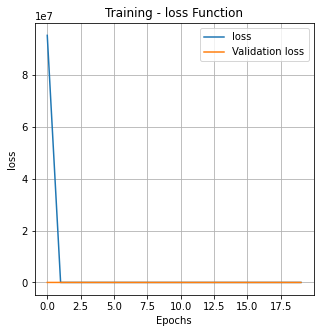

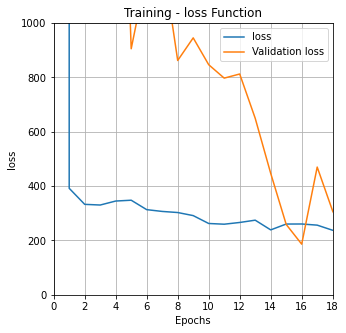

In [19]:
# Graphische Darstellung der Fehler während des Trainings.

def plot_training_curve(history, xlim=None, ylim=None,keys=['loss']):
    for key in keys:
        plt.figure(figsize=(5, 5))
        #plt.subplot(2, 2, 1)
        plt.plot(history.history[key], label=key)
        plt.plot(history.history['val_'+key], label='Validation '+key)
        plt.legend()
        plt.title('Training - '+key+' Function')
        plt.xlabel('Epochs')
        plt.ylabel(key)
        plt.grid()
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)

 

plot_training_curve(history)
# Vergößerung (xlim und ylim ev. anpassen!)
plot_training_curve(history,xlim=(0,18),ylim=(0,1000))

In [20]:
model.save("Dragan2.h5")

In [21]:
from tensorflow.keras.models import load_model

In [22]:
testmodel = load_model("Dragan2.h5")


In [23]:
testmodel.predict(X_test)

array([[ 98.186],
       [ 57.831],
       [ 78.499],
       [ 86.654],
       [ 84.115],
       [ 72.122],
       [ 92.499],
       [ 88.312],
       [ 96.416],
       [ 85.354],
       [ 85.042],
       [ 72.206],
       [ 65.002],
       [ 81.256],
       [ 64.423],
       [ 75.268],
       [ 89.783],
       [ 92.332],
       [ 60.452],
       [ 86.709],
       [ 81.271],
       [ 78.213],
       [ 84.798],
       [ 79.866],
       [102.672],
       [ 77.407],
       [ 82.276],
       [ 78.923],
       [ 68.348],
       [ 62.569],
       [ 72.737],
       [ 81.908],
       [ 80.97 ],
       [ 60.006],
       [ 90.17 ],
       [ 74.416],
       [ 63.115],
       [ 66.039],
       [ 97.326],
       [ 89.263],
       [ 68.014],
       [ 91.937],
       [104.807],
       [ 81.891],
       [ 79.449],
       [ 67.272],
       [ 82.912],
       [ 84.45 ],
       [ 89.693],
       [ 91.485],
       [ 74.142],
       [ 81.305],
       [ 83.776],
       [ 67.741],
       [ 62.022],
       [ 8

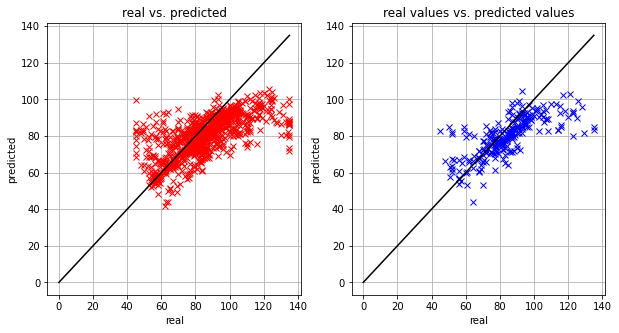

In [24]:
def plot_real_vs_predicted(model, Xtrain,y_train,Xtest,y_test):
    y_train_pred = model.predict(X_train)   # Verwendung der Methode predict wird in Funkt. integriert
    y_test_pred = model.predict(X_test)     # Verwendung der Methode predict
    y_max = np.max([y_train.max(),y_train_pred.max(),y_test.max(),y_test_pred.max()])
    # Graphische Darstellung
    # Trainingdaten
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(y_train,y_train_pred,'rx')
    plt.plot([0,y_max],[0,y_max],'k-')
    plt.title('real vs. predicted')
    plt.xlabel('real')
    plt.ylabel('predicted')
    plt.grid()
    # Testdaten
    plt.subplot(1, 2, 2)
    plt.plot(y_test,model.predict(X_test),'bx')
    plt.plot([0,y_max],[0,y_max],'k-')
    plt.title('real values vs. predicted values')
    plt.xlabel('real')
    plt.ylabel('predicted')
    plt.grid()

plot_real_vs_predicted(model, X_train,y_train,X_test,y_test)

In [28]:
mse_train_linear_model_FuncAPI = model.evaluate(X_train, y_train, verbose=0)
mse_test_linear_model_FuncAPI = model.evaluate(X_test, y_test, verbose=0)
print('MSE train:',mse_train_linear_model_FuncAPI)
print('MSE test :',mse_test_linear_model_FuncAPI)

MSE train: 213.81549072265625
MSE test : 173.55308532714844
